## Lession 12: Community structure of complex networks

We will cover several algorithms for finding community structure in complex networks:
1. Grivan-Newman algorithm centrality
2. Modularity optimisation with Greedy algorithm  
3. Louvain algorithm <br>
<br>
We will apply this algorithm to Zachary’s Karate Club network, NG and LFR benchmark graphs and some real networks.
<br>
We will show examples of ground truth communities and compare communities found by different algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rn

In [2]:
print(nx.__version__)

3.0


In [3]:
#!pip install --upgrade networkx

### 1. Zachary’s Karate Club network

Network shows the connections between the 34 members of Zachary's Karate Club. Edges represent interactions between  members outside the club. The club split in two C1=[0,1,2,3,4,5,6,7,8,10,11,12,13,16,17,19,21] and C2=[9,14,15,18,20,22,23,24,25,26,27,28,29,30,31,32,33] <br>


In [4]:
G = nx.karate_club_graph()

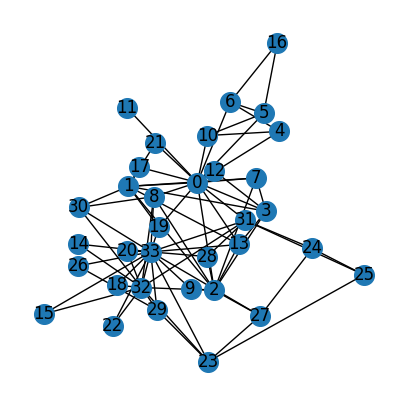

In [5]:
plt.figure(figsize =(5, 5))
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=200)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G,pos=pos)
plt.box(False)
plt.show()

In [6]:
gt_membership = [G.nodes[v]["club"] for v in G.nodes()]
print(gt_membership)

['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer']


In [7]:
C1=[]
C2=[]
for v in G.nodes():
    if gt_membership[v]=="Mr. Hi":
        C1.append(v)
    else:
        C2.append(v)
print(C1)
print(C2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [8]:
zkc_c=[]
for v in G.nodes():
    if v in C1:
        zkc_c.append(0)
    else:
        zkc_c.append(1)    
G1=G.subgraph(C1)
G2=G.subgraph(C2)

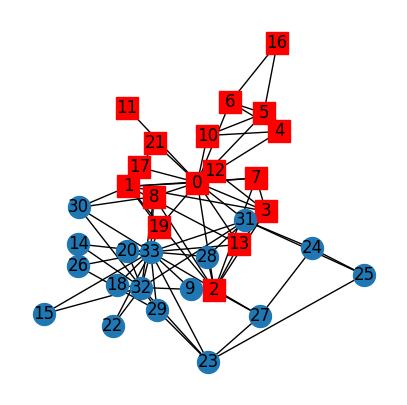

In [9]:
plt.figure(figsize =(5, 5))
nx.draw_networkx_nodes(G1, pos=pos, node_size=250,node_shape="s", node_color="red")
nx.draw_networkx_nodes(G2, pos=pos, node_size=250)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G,pos=pos)
plt.box(False)
plt.show()

#### 1.1 Girvan-Newman centrality algorithm

Implementations for some algorithms can be found in Networkx library: https://networkx.org/documentation/stable/reference/algorithms/community.html

In [10]:
import networkx.algorithms.community as nx_comm

In [11]:
communities = list(nx_comm.girvan_newman(G))
print(communities)

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}), ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11}), ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26}), ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26}), ({0, 1, 3, 7, 13, 17, 19, 21}, {2

How to plot dendrogram: https://stackoverflow.com/questions/59821151/plot-the-dendrogram-of-communities-found-by-networkx-girvan-newman-algorithm

In [12]:
from itertools import chain, combinations
from scipy.cluster.hierarchy import dendrogram

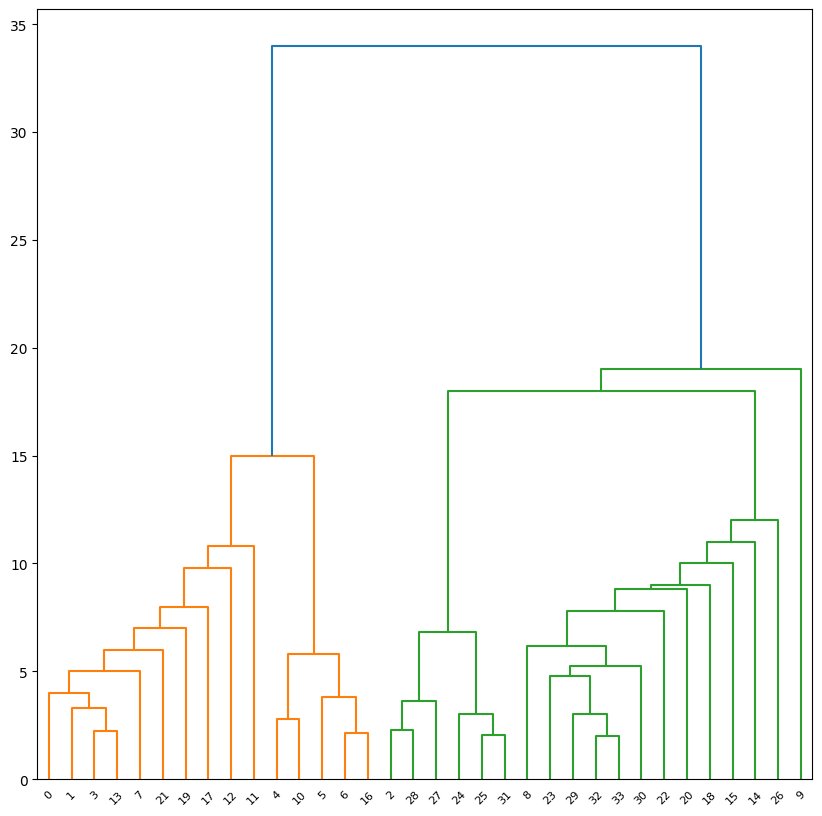

In [13]:
node_id = 0
init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
for comm in communities:
    for subset in list(comm):
        if subset not in init_node2community_dict.values():
            node_id += 1
            init_node2community_dict[node_id] = subset

# turning this dictionary to the desired format in @mdml's answer
node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
    for node_id_parent, group in init_node2community_dict.items():
        if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
            node_id_to_children[node_id_parent].append(node_id1)
            node_id_to_children[node_id_parent].append(node_id2)

# also recording node_labels dict for the correct label for dendrogram leaves
node_labels = dict()
for node_id, group in init_node2community_dict.items():
    if len(group) == 1:
        node_labels[node_id] = list(group)[0]
    else:
        node_labels[node_id] = ''

# also needing a subset to rank dict to later know within all k-length merges which came first
subset_rank_dict = dict()
rank = 0
for e in communities[::-1]:
    for p in list(e):
        if tuple(p) not in subset_rank_dict:
            subset_rank_dict[tuple(sorted(p))] = rank
            rank += 1
subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

# my function to get a merge height so that it is unique (probably not that efficient)
def get_merge_height(sub):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

# finally using @mdml's magic, slightly modified:
DG           = nx.DiGraph(node_id_to_children)
nodes       = DG.nodes()
leaves      = set( n for n in nodes if DG.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if DG.out_degree(n) > 0 ]

# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )
for u in inner_nodes:
    children = set()
    node_list = list(node_id_to_children[u])
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += node_id_to_children[v]
    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = node_id_to_children[n]
    x = children[0]
    for y in children[1:]:
        z = tuple(sorted(subtree[x] + subtree[y]))
        i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
        Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1

# dendrogram
plt.figure(figsize =(10, 10))
dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
#plt.savefig('dendrogram.png')
plt.show()

In [14]:
communities[0][0]

{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}

In [15]:
communities[0][1]

{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

In [16]:
zkc_c_NG0=[]
for v in G.nodes():
    if v in communities[0][0]:
        zkc_c_NG0.append(0)
    else:
        if v in communities[0][1]:
            zkc_c_NG0.append(1) 

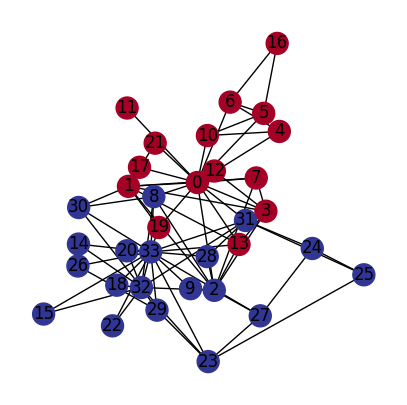

In [17]:
plt.figure(figsize =(5, 5))
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_NG0)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)
plt.show()

In [18]:
communities[1][0]

{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}

In [19]:
communities[1][1]

{2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

In [20]:
communities[1][2]

{9}

In [21]:
zkc_c_NG1=[]
for v in G.nodes():
    if v in communities[1][0]:
        zkc_c_NG1.append(0)
    else:
        if v in communities[1][1]:
            zkc_c_NG1.append(1)
        else:
            zkc_c_NG1.append(2)

In [22]:
zkc_c_NG2=[]
for v in G.nodes():
    if v in communities[2][0]:
        zkc_c_NG2.append(0)
    else:
        if v in communities[2][1]:
            zkc_c_NG2.append(1)
        else:
            if v in communities[2][2]:
                zkc_c_NG2.append(2)
            else:
                zkc_c_NG2.append(3)

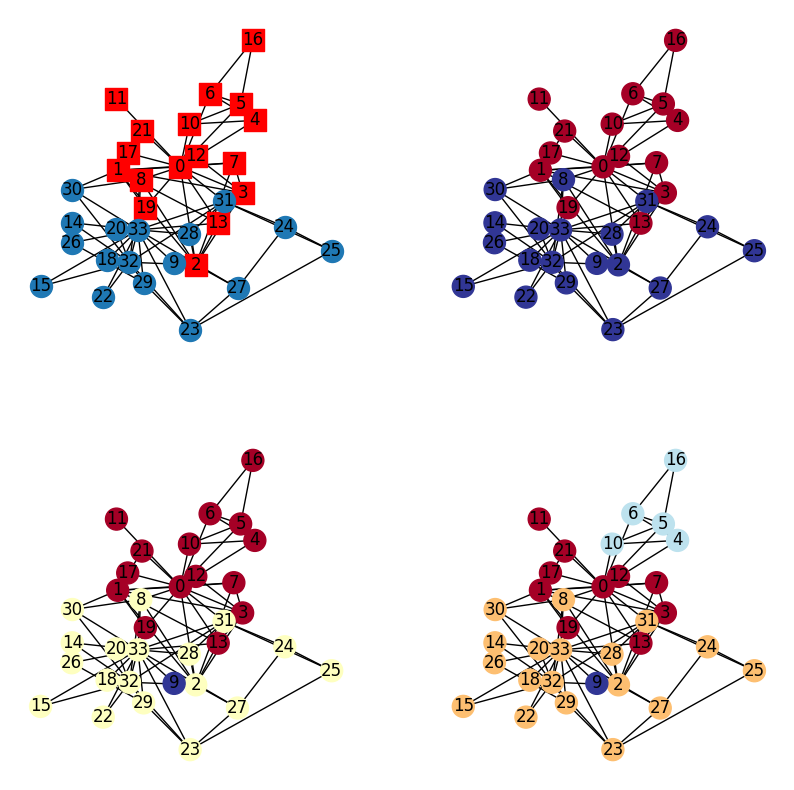

In [23]:
plt.figure(figsize =(10, 10))
plt.subplot(2,2,1)
nx.draw_networkx_nodes(G1, pos=pos, node_size=250,node_shape="s", node_color="red")
nx.draw_networkx_nodes(G2, pos=pos, node_size=250)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G,pos=pos)
plt.box(False)

plt.subplot(2,2,2)
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_NG0)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)

plt.subplot(2,2,3)
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_NG1)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)

plt.subplot(2,2,4)
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_NG2)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)

plt.show()

#### 1.2 Greedy algorithm

In [24]:
c = nx_comm.greedy_modularity_communities(G)

In [25]:
print(c)

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]


In [26]:
zkc_c_GD=[]
for v in G.nodes():
    if v in c[0]:
        zkc_c_GD.append(0)
    else:
        if v in c[1]:
            zkc_c_GD.append(1)
        else:
            zkc_c_GD.append(2)

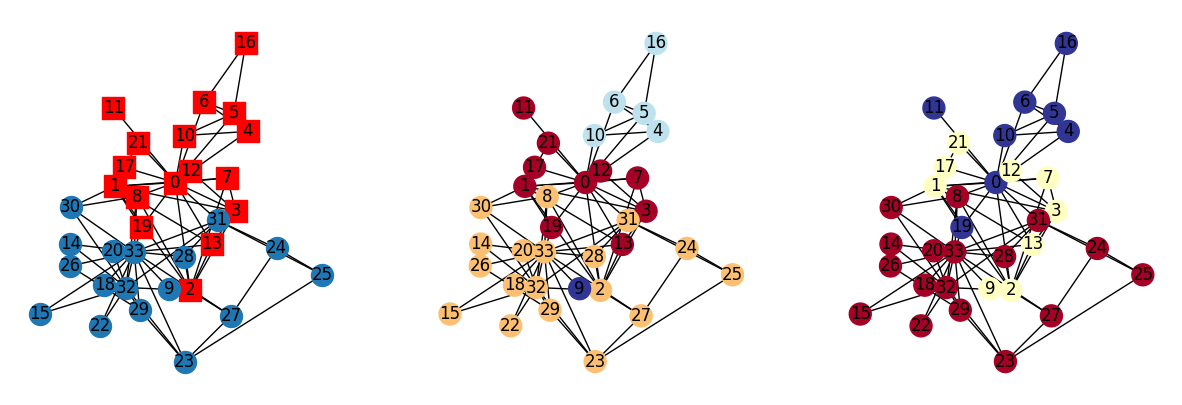

In [27]:
plt.figure(figsize =(15, 5))
plt.subplot(1,3,1)
nx.draw_networkx_nodes(G1, pos=pos, node_size=250,node_shape="s", node_color="red")
nx.draw_networkx_nodes(G2, pos=pos, node_size=250)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G,pos=pos)
plt.box(False)

plt.subplot(1,3,2)
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_NG2)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)

plt.subplot(1,3,3)
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_GD)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)

plt.show()

### 1.3 Louvain algorithm 

Details at https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities

In [28]:
cl=nx_comm.louvain_communities(G)

In [29]:
print(cl)

[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 26, 29, 30}, {23, 24, 25, 27, 28, 31}]


In [30]:
cl_low=nx_comm.louvain_communities(G,resolution=0.5)

In [31]:
print(cl)

[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 26, 29, 30}, {23, 24, 25, 27, 28, 31}]


In [32]:
zkc_c_LV4=[]
for v in G.nodes():
    if v in cl[0]:
        zkc_c_LV4.append(0)
    else:
        if v in cl[1]:
            zkc_c_LV4.append(1)
        else:
            if v in cl[2]:
                zkc_c_LV4.append(2)
            else:
                zkc_c_LV4.append(3)

In [33]:
zkc_c_LV2=[]
for v in G.nodes():
    if v in cl_low[0]:
        zkc_c_LV2.append(0)
    else:
        zkc_c_LV2.append(1)

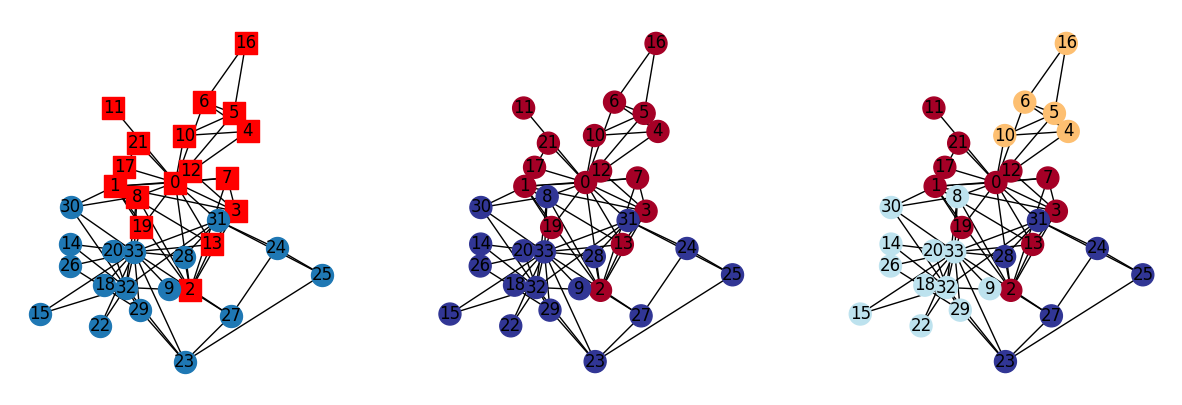

In [34]:
plt.figure(figsize =(15, 5))
plt.subplot(1,3,1)
nx.draw_networkx_nodes(G1, pos=pos, node_size=250,node_shape="s", node_color="red")
nx.draw_networkx_nodes(G2, pos=pos, node_size=250)
nx.draw_networkx_labels(G, pos=pos)
nx.draw_networkx_edges(G,pos=pos)
plt.box(False)

plt.subplot(1,3,2)
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_LV2)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)

plt.subplot(1,3,3)
nx.draw_networkx_nodes(G, pos=pos, node_size=250, cmap=plt.cm.RdYlBu, node_color=zkc_c_LV4)
nx.draw_networkx_edges(G,pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.box(False)

plt.show()

### 2. Mutual Information

Source: https://github.com/satyakisikdar/NMI <br>
We have copied the function for mutual information from source code <br>
Input are two partitions of the network in the form of dictionary c_A and c_B, and network size S <br>
IDs of nodes must be the same in both partitions! Number of nodes in both partitions must be the same!

In [35]:
from math import log

def mutual_info(c_A, c_B, S):
    N_mA = len(c_A)
    N_mB = len(c_B)
    I_num = 0
    for i in c_A:
        for j in c_B:
            n_i = len(c_A[i])
            n_j = len(c_B[j])
            n_ij = len(c_A[i] & c_B[j])
            if n_ij == 0:
                continue
            log_term = log((n_ij * S) / (n_i * n_j))

            I_num += n_ij * log_term
    I_num *= -2

    I_den = 0
    for i in c_A:
        n_i = len(c_A[i])
        I_den += n_i * log(n_i / S)

    for j in c_B:
        n_j = len(c_B[j])
        I_den += n_j * log(n_j / S)

    I = I_num / I_den
    return I

Partition needs to be in the form of dictionary where key is ID of communitiy and value is set of nodes belonging to th`at community: {0:[1,2,3,4,5], 1:[6,7,8,9,10]} 

Original partition C1 and C2

In [36]:
print(C1)
print(C2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [37]:
zkc_or={}
zkc_or[0]=set(C1)
zkc_or[1]=set(C2)

In [38]:
print(zkc_or)

{0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}, 1: {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}}


Communities found by Girvan-Newman centrality algorithm for $n_{c}=2$

In [39]:
print(communities[0][0])
print(communities[0][1])

{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


In [40]:
zkc_ng={}
zkc_ng[0]=set(communities[0][0])
zkc_ng[1]=set(communities[0][1])

In [41]:
print(zkc_ng)

{0: {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, 1: {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}}


Communities found by greedy algorithm with $n_{c}=3$

In [42]:
zkc_gd={}
zkc_gd[0]=set(c[0])
zkc_gd[1]=set(c[1])
zkc_gd[2]=set(c[2])

In [43]:
print(zkc_gd)

{0: {8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, 1: {1, 2, 3, 7, 9, 12, 13, 17, 21}, 2: {0, 4, 5, 6, 10, 11, 16, 19}}


Communities found by Louvain algorithm with resolution 1 with optimal $n_{c}=4$

In [44]:
zkc_lv_4={}
zkc_lv_4[0]=set(cl[0])
zkc_lv_4[1]=set(cl[1])
zkc_lv_4[2]=set(cl[2])
zkc_lv_4[3]=set(cl[3])

In [45]:
print(zkc_lv_4)

{0: {0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, 1: {16, 4, 5, 6, 10}, 2: {32, 33, 8, 9, 14, 15, 18, 20, 22, 26, 29, 30}, 3: {23, 24, 25, 27, 28, 31}}


In [46]:
zkc_lv_2={}
zkc_lv_2[0]=set(cl_low[0])
zkc_lv_2[1]=set(cl_low[1])

In [47]:
print(zkc_lv_2)

{0: {0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, 1: {8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}}


Ground truth vs. Girvan-Newman centrality algorithm

In [48]:
In=mutual_info(zkc_or, zkc_ng, G.number_of_nodes())
print("Mutual information for ground truth partition and Girvan-Newman centrality partition is", In)

Mutual information for ground truth partition and Girvan-Newman centrality partition is 0.7323776321005689


Ground truth vs. Greedy algorithm

In [49]:
In=mutual_info(zkc_or, zkc_gd, G.number_of_nodes())
print("Mutual information for ground truth partition and greedy algorithm partition is", In)

Mutual information for ground truth partition and greedy algorithm partition is 0.5646068790944768


Ground truth vs. Louvain algorithm

In [50]:
In=mutual_info(zkc_or, zkc_lv_4, G.number_of_nodes())
print("Mutual information for ground truth partition and Louvain algorithm partition for resolution 1 is", In)

Mutual information for ground truth partition and Louvain algorithm partition for resolution 1 is 0.587849706825067


In [51]:
In=mutual_info(zkc_or, zkc_lv_2, G.number_of_nodes())
print("Mutual information for ground truth partition and Louvain algorithm partition for resolution 0.5 is", In)

Mutual information for ground truth partition and Louvain algorithm partition for resolution 0.5 is 0.8371694628777809


### 3. Louvain algorithm on Girvan-Newman benchmark

In [56]:
CGN=[]
GN_or_p={}
i=0
c=0
GN_or_p[0]=set()
for v in range(0,128):
    if i<32:
        CGN.append(c)
        GN_or_p[c].add(v)
        i+=1
    else:
        if i==32:
            c+=1
            GN_or_p[c]=set()
            GN_or_p[c].add(v)
            CGN.append(c)
            i=1

In [57]:
for i in range(1,11):
    pin=i*0.1
    B=nx.random_partition_graph([32,32,32,32],pin,0.1)
    kext=0
    kint=0
    for v in B.nodes():
        for u in B.neighbors(v):
            if CGN[v]==CGN[u]:
                kint+=1
            else:
                kext+=1
    mu=(1.0*kext)/(1.0*(kext+kint))
    print(pin,mu)

0.1 0.7433090024330901
0.2 0.60543580131209
0.30000000000000004 0.52
0.4 0.45089605734767024
0.5 0.3771186440677966
0.6000000000000001 0.3351893095768374
0.7000000000000001 0.30412633723892
0.8 0.28370403994552884
0.9 0.25694156651471195
1.0 0.23809523809523808


In [58]:
mu_x=[]
In=[]
for i in range(1,11):
    pin=i*0.1
    #generate Girvan-Newman benchmark
    B=nx.random_partition_graph([32,32,32,32],pin,0.1)
    #find communities with Louvain algorithm
    cl_GN=nx_comm.louvain_communities(B,0.5)
    GN_lv_p={}
    for i in range(0,len(cl_GN)):
        GN_lv_p[i]=set()
        for v in cl_GN[i]:
            GN_lv_p[i].add(v)
    #calculate mu
    kext=0
    kint=0
    for v in B.nodes():
        for u in B.neighbors(v):
            if CGN[v]==CGN[u]:
                kint+=1
            else:
                kext+=1
    mu=(1.0*kext)/(1.0*(kext+kint))
    #calculate mutual information
    I=mutual_info(GN_or_p, GN_lv_p, B.number_of_nodes())
    In.append(I)
    mu_x.append(mu)
    

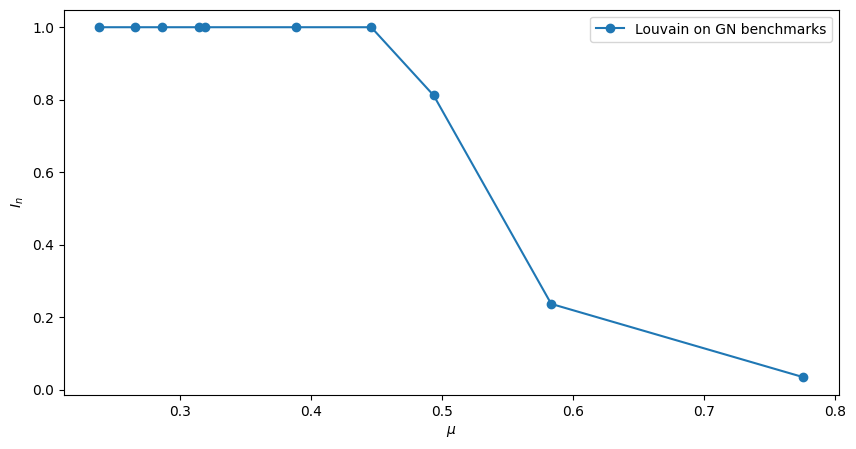

In [59]:
plt.figure(figsize=(10,5))
plt.xlabel("$\mu$")
plt.ylabel('$I_{n}$')
plt.plot(mu_x,In,"o-", label="Louvain on GN benchmarks")
plt.legend()
plt.show()


### 4. Louvain algorithm on LFR benchmark

Details about generator for LFR benchmark: https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.LFR_benchmark_graph.html

In [60]:
from networkx.generators.community import LFR_benchmark_graph

In [64]:
LFR =LFR_benchmark_graph(250, 3, 1.5, 0.1, average_degree=4, min_community=20)

The LFR benchmark graph generated according to the specified parameters. <br>
Each node in the graph has a node attribute 'community' that stores the community (that is, the set of nodes) that includes it.


In [65]:
ct={frozenset(LFR.nodes[v]["community"]) for v in LFR}
LFR_or={}
i=0
for c in ct:
    LFR_or[i]=set(c)
    i+=1

In [66]:
color=[]
for v in LFR.nodes():
    color.append(0)
for c in LFR_or.keys():
    for v in LFR_or[c]:
        color[v]=c

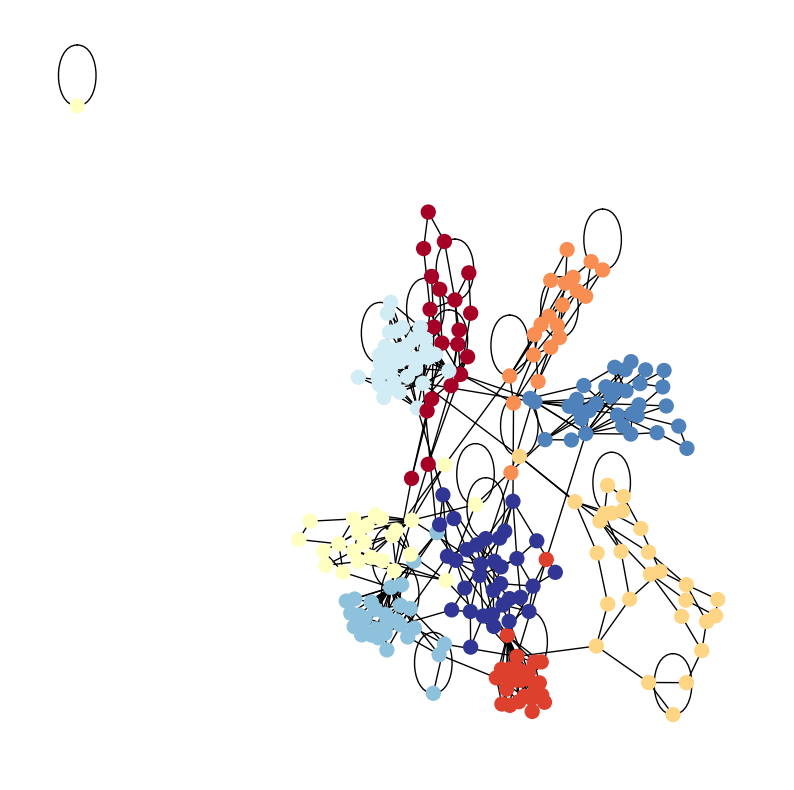

In [67]:
plt.figure(figsize =(10, 10))
posLFR=nx.spring_layout(LFR)
nx.draw_networkx_nodes(LFR, pos=posLFR, node_size=100, cmap=plt.cm.RdYlBu, node_color=color)
nx.draw_networkx_edges(LFR,pos=posLFR)
plt.box(False)
plt.show()

In [68]:
mu_LFR=[]
In_LFR=[]
for i in range(1,10):
    mu=i*0.1
    #generate LFR benchmark
    LFR =LFR_benchmark_graph(1000, 3, 1.1, mu, max_degree=50, average_degree=20, max_community=100, min_community=20)
    #ground truth communities
    ct={frozenset(LFR.nodes[v]["community"]) for v in LFR}
    LFR_or={}
    i=0
    for c in ct:
        LFR_or[i]=set(c)
        i+=1
    #find communities with Louvain algorithm
    cl_LFR=nx_comm.louvain_communities(LFR,1.0)
    LFR_lv_p={}
    for i in range(0,len(cl_LFR)):
        LFR_lv_p[i]=set()
        for v in cl_LFR[i]:
            LFR_lv_p[i].add(v)
    #calculate mutual information
    I=mutual_info(LFR_or, LFR_lv_p, LFR.number_of_nodes())
    In_LFR.append(I)
    mu_LFR.append(mu)

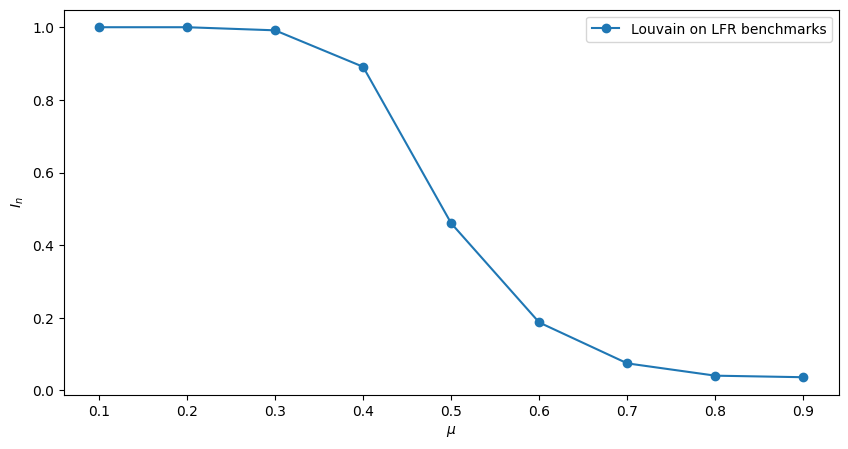

In [69]:
plt.figure(figsize=(10,5))
plt.xlabel("$\mu$")
plt.ylabel('$I_{n}$')
plt.plot(mu_LFR,In_LFR,"o-", label="Louvain on LFR benchmarks")
plt.legend()
plt.show()


### 5. Community structure of Game of thrones network

We will use two modularity based algorithms, Greedy and Louvain algorithm, to find the community structure in weighted GoT network and compare these three partitions.

In [70]:
nodesGT=pd.read_csv("../data/game_thrones/nodes.csv")

In [71]:
nodesGT.head()

,# index,name,_pos
0,0,Aemon,"array([-6.26710367, -3.98543356])"
1,1,Grenn,"array([-6.16876976, -4.25622392])"
2,2,Samwell,"array([-6.20040749, -4.16643914])"
3,3,Aerys,"array([-6.22351778, -3.5141172 ])"
4,4,Jaime,"array([-6.08939813, -3.6398448 ])"


In [72]:
edgesGT=pd.read_csv("../data/game_thrones/edges.csv")

In [73]:
edgesGT.head()

,# source,target,weight
0,0,1,5
1,0,2,31
2,2,82,6
3,2,58,34
4,2,76,12


Load a network

In [74]:
GOT=nx.from_pandas_edgelist(edgesGT,
                                     source = '# source', 
                                     target = ' target', 
                                     edge_attr=' weight',
                                     create_using =nx.Graph)

In [75]:
mapping={}
for index,row in nodesGT.iterrows():
    mapping[row['# index']]=row[' name']
    

In [76]:
GOT= nx.relabel_nodes(GOT, mapping)

In [77]:
GOT.number_of_nodes()

107

In [78]:
GOT.number_of_edges()

352

In [79]:
posGOT=nx.spring_layout(GOT,  weight=' weight')

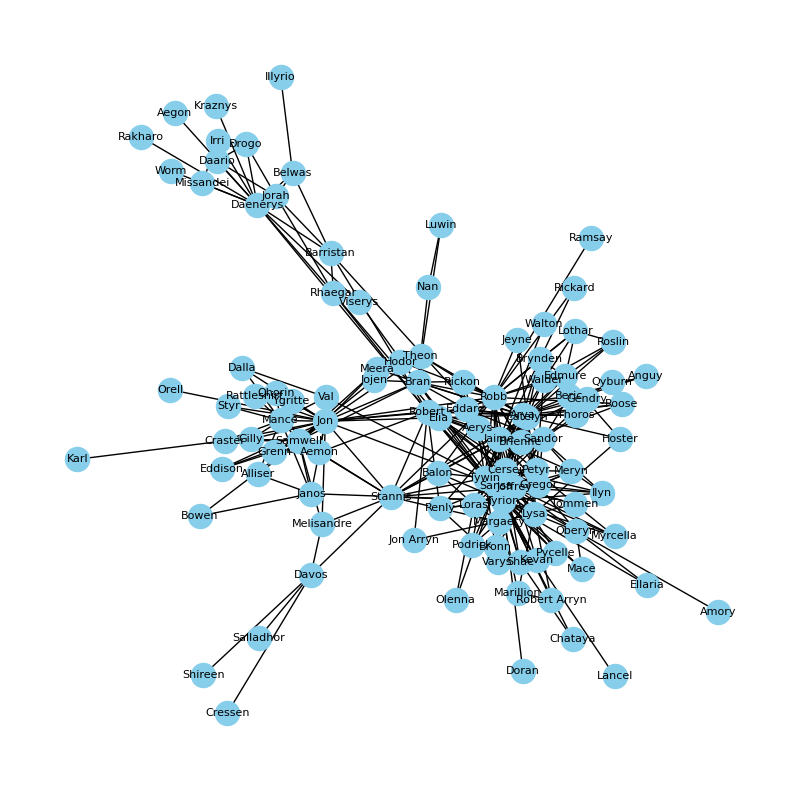

In [80]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(GOT, pos=posGOT, node_size=300, node_color="skyblue")
nx.draw_networkx_labels(GOT, pos=posGOT, font_size=8, font_color='k', font_family='sans-serif', font_weight='normal', alpha=1.0, bbox=None, ax=None,)
nx.draw_networkx_edges(GOT,pos=posGOT)
plt.box(False)
plt.show()

In [81]:
got_gr=nx_comm.greedy_modularity_communities(GOT,weight=' weight')

Number of communities

In [82]:
print(len(got_gr))

7


In [83]:
GOT_gr={}
color_gr=[]
for i in range(0,len(got_gr)):
    GOT_gr[i]=set(got_gr[i])
for v in GOT.nodes():
    for c in GOT_gr.keys():
        if v in GOT_gr[c]:
            color_gr.append(c)

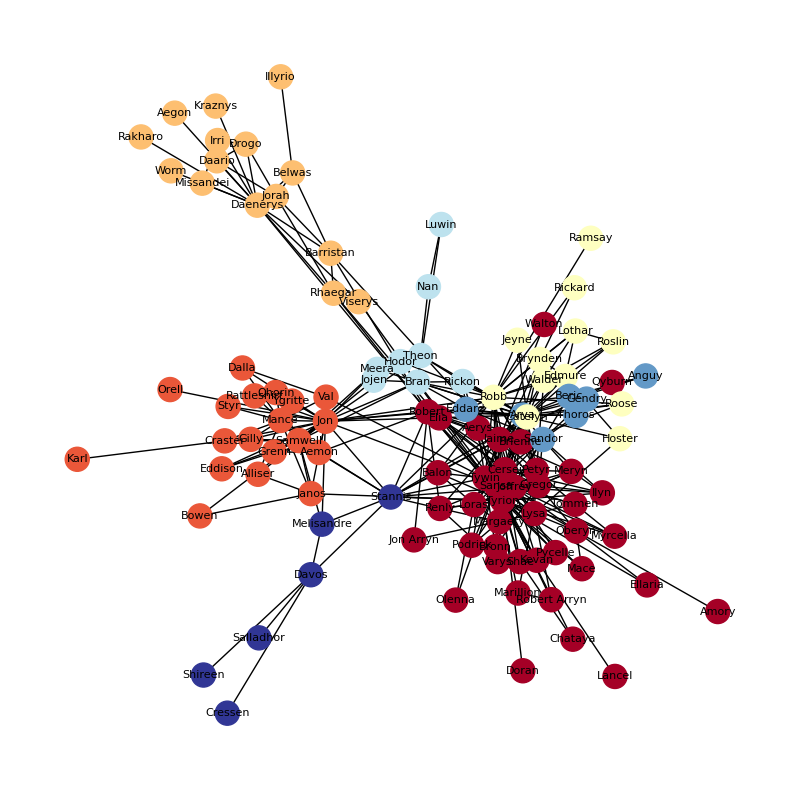

In [84]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(GOT, pos=posGOT, node_size=300, cmap=plt.cm.RdYlBu, node_color=color_gr)
nx.draw_networkx_labels(GOT, pos=posGOT, font_size=8, font_color='k', font_family='sans-serif', font_weight='normal', alpha=1.0, bbox=None, ax=None,)
nx.draw_networkx_edges(GOT,pos=posGOT)
plt.box(False)
plt.show()

In [85]:
got_lv=nx_comm.louvain_communities(GOT,weight=' weight')

Number of communities

In [86]:
print(len(got_lv))

7


In [87]:
GOT_lv={}
color_lv=[]
for i in range(0,len(got_lv)):
    GOT_lv[i]=set(got_lv[i])
for v in GOT.nodes():
    for c in GOT_lv.keys():
        if v in GOT_lv[c]:
            color_lv.append(c)

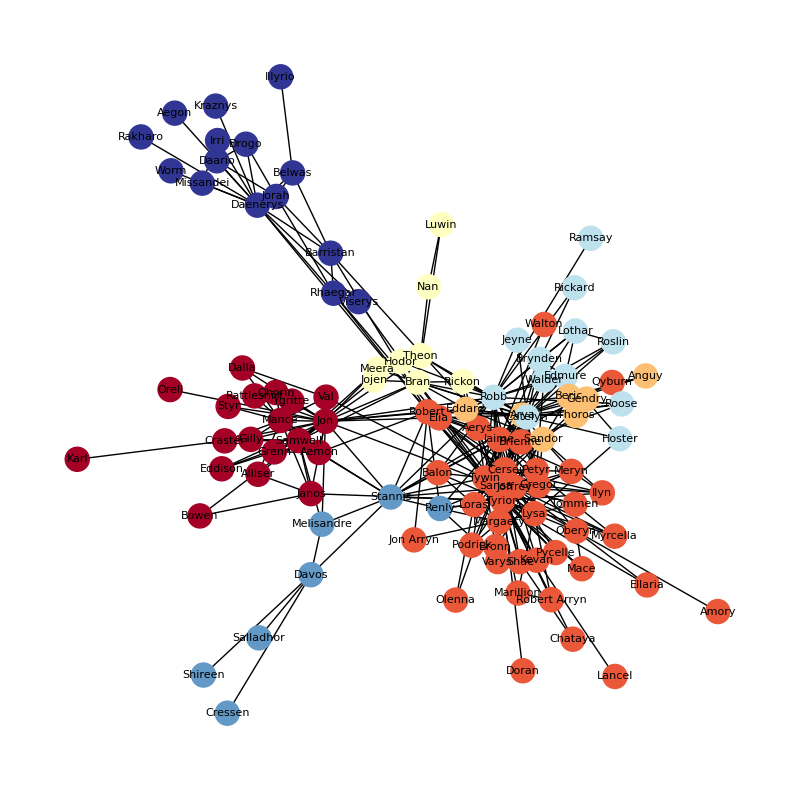

In [88]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(GOT, pos=posGOT, node_size=300, cmap=plt.cm.RdYlBu, node_color=color_lv)
nx.draw_networkx_labels(GOT, pos=posGOT, font_size=8, font_color='k', font_family='sans-serif', font_weight='normal', alpha=1.0, bbox=None, ax=None,)
nx.draw_networkx_edges(GOT,pos=posGOT)
plt.box(False)
plt.show()

In [89]:
In=mutual_info(GOT_gr, GOT_lv, GOT.number_of_nodes())
print("Mutual information for partitions found with Greedy and Louvain algorithm is", In)

Mutual information for partitions found with Greedy and Louvain algorithm is 0.9797065427249728


## Homework

Disregard weights in Game of Throne network and find community structure with Louvain algorithm. If you run algorithm 1000 times, will you always get the same number of communities? What is the average number of communities that you get?
Submission link: https://forms.gle/mCbjWgfMi5tCG6kt9